Lecture notes
* very usuful task
* sequence to sequence task
* Blue score is used to evaluate 
    - prediction is compared with multiple references texts
    - score between 0 and 1
    - precision of n-gram , it comapres the n gram between prediciton and target if the ngram exists the prediciton is valid.
    

#### PS: Make sure to use python 3.6 installed in pydev virtuel env 

In [1]:
from transformers import pipeline

In [2]:
# ! pip install sentencepiece

translator = pipeline("translation" , model='Helsinki-NLP/opus-mt-en-es')


In [3]:
eng2spa = {}
for line in open('data/spa-eng/spa.txt' , encoding="utf-8"):
    line = line.rstrip()
    eng, spa = line.split("\t")
    if eng not in eng2spa:
        eng2spa[eng] = []
        eng2spa[eng].append(spa)


In [4]:
eng2spa

{'Go.': ['Ve.'],
 'Hi.': ['Hola.'],
 'Run!': ['¡Corre!'],
 'Run.': ['Corred.'],
 'Who?': ['¿Quién?'],
 'Fire!': ['¡Fuego!'],
 'Help!': ['¡Ayuda!'],
 'Jump!': ['¡Salta!'],
 'Jump.': ['Salte.'],
 'Stop!': ['¡Parad!'],
 'Wait!': ['¡Espera!'],
 'Wait.': ['Esperen.'],
 'Go on.': ['Continúa.'],
 'Hello!': ['Hola.'],
 'I ran.': ['Corrí.'],
 'I try.': ['Lo intento.'],
 'I won!': ['¡He ganado!'],
 'Oh no!': ['¡Oh, no!'],
 'Relax.': ['Tomátelo con soda.'],
 'Smile.': ['Sonríe.'],
 'Attack!': ['¡Al ataque!'],
 'Get up.': ['Levanta.'],
 'Go now.': ['Ve ahora mismo.'],
 'Got it!': ['¡Lo tengo!'],
 'Got it?': ['¿Lo pillas?'],
 'He ran.': ['Él corrió.'],
 'Hop in.': ['Métete adentro.'],
 'Hug me.': ['Abrázame.'],
 'I fell.': ['Me caí.'],
 'I know.': ['Yo lo sé.'],
 'I left.': ['Salí.'],
 'I lied.': ['Mentí.'],
 'I lost.': ['Perdí.'],
 'I quit.': ['Dimito.'],
 'I work.': ['Estoy trabajando.'],
 "I'm 19.": ['Tengo diecinueve.'],
 "I'm up.": ['Estoy levantado.'],
 'Listen.': ['Escucha.'],
 'No way!': ['

In [5]:
from nltk.translate.bleu_score import sentence_bleu , SmoothingFunction
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

tokens = tokenizer.tokenize("¿Qué hay de nuevo?".lower())

#firs param are list of refrences ( acceptable translation) and 2nd arg is the model output
# sentence_bleu works even on integers
sentence_bleu([tokens], tokens)

1.0

In [6]:
smoother = SmoothingFunction()
sentence_bleu([tokens], tokens, smoothing_function=smoother.method4)

1.0

In [7]:
eng2spa_tokens = {}
for eng , spa_list in eng2spa.items():
    spa_list_tokens = []
    for text in spa_list:
        tokens = tokenizer.tokenize(text.lower())
        spa_list_tokens.append(tokens)
    eng2spa_tokens[eng] = spa_list_tokens

In [8]:
translator("i love me")

[{'translation_text': 'Me quiero.'}]

In [25]:
eng_phrases = eng2spa.keys()
len(eng_phrases)
eng_phrases_subset = list(eng_phrases)[20000:20100]

In [26]:
translations = []
for text in eng_phrases_subset:
    
    translation = translator(text)
    translations.append(translation[0]['translation_text'])

print(translations)

['Tom está en el jardín.', 'Tom está en la ducha.', 'Tom es como tú.', 'Tom nos está mirando.', 'Tom es mi único hijo.', 'Tom nunca llega a tiempo.', 'Tom no es un estudiante.', 'Tom no es religioso.', 'Tom está ahora en prisión.', 'Tom es anticuado.', 'Tom es demasiado emocional.', 'Tom está tocando el piano.', 'Tom está orgulloso de María.', 'Tom es bastante popular.', 'Tom está regañando a Mary.', 'Tom está buscando un trabajo.', 'Tom trabaja por cuenta propia.', 'Tom está enviando un fax.', 'Tom es bajo y gordo.', 'Tom sigue desconcertado.', 'Tom sigue sentado.', 'Tom sigue esperando.', 'Tom sigue preocupado.', 'Tom está estudiando duro.', 'Tom está descansando.', 'Tom es el acusado.', 'Tom es el verdadero héroe.', 'Tom es muy guapo.', 'Tom es muy confiable.', 'Tom es muy romántico.', 'Tom es muy meticuloso.', 'Tom está viendo golf.', 'Tom está trabajando allí.', 'Tom no es canadiense.', 'Tom no es un extraño.', 'Tom no está solo ahora.', 'Tom no es optimista.', 'Tom no es tan jove

In [27]:
scores = []
for eng , pred in zip(eng_phrases_subset , translations):
    matches = eng2spa_tokens[eng]

    spa_pred = tokenizer.tokenize(pred.lower())
    score = sentence_bleu(matches, spa_pred)
    scores.append(score)

/Users/macbookpro/.pyenv/versions/3.6.9/lib/python3.6/site-packages/nltk/translate/bleu_score.py:515: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/Users/macbookpro/.pyenv/versions/3.6.9/lib/python3.6/site-packages/nltk/translate/bleu_score.py:515: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/Users/macbookpro/.pyenv/versions/3.6.9/lib/python3.6/site-packages/nltk/translate/bleu_score.py:515: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it cont

(array([54.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  2.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 40.]),
 array([9.91889248e-232, 2.00000000e-002, 4.00000000e-002, 6.00000000e-002,
        8.00000000e-002, 1.00000000e-001, 1.20000000e-001, 1.40000000e-001,
        1.60000000e-001, 1.80000000e-001, 2.00000000e-001, 2.20000000e-001,
        2.40000000e-001, 2.60000000e-001, 2.80000000e-001, 3.00000000e-001,
        3.20000000e-001, 3.40000000e-001, 3.60000000e-001, 3.80000000e-001,
        4.00000000e-001, 4.20000000e-001, 4.40000000e-001, 4.60000000e-001,
        4.80000000e-001, 5.00000000e-001, 5.20000000e-001, 5.40000000e-001,
        5.60000000e-001, 5.80000000e-001, 6.00000000e-001, 6.20000000e-001,
        6.40000000e-001, 6.60000000e-001, 6.80000000e-001, 7.00000000e-001,
        7.20000000e-001, 7.40000

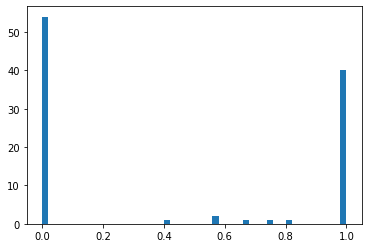

In [28]:
import matplotlib.pyplot as plt
plt.hist(scores , bins=50)

In [33]:
import numpy as np
print(np.mean(scores))

0.4380667645403358


In [32]:
eng_phrases.toList()

AttributeError: 'dict_keys' object has no attribute 'toList'

In [48]:
np.random.seed(1)
def random_translation(eng2spa = eng2spa,eng_phrases= eng_phrases ):
    
    res = {"eng": "", 
    "translation": "", 
    score: 0}

    index = np.random.choice(len(list(eng_phrases)))
    eng = list(eng_phrases)[index]
    translation = translator(eng)[0]['translation_text']
    matches = eng2spa_tokens[eng]
    spa_tokens = tokenizer.tokenize(translation.lower())
    res['eng'] = eng
    res['translation'] = translation.lower()
    res['score'] = sentence_bleu(matches, spa_tokens)

    return res
    

In [50]:
print(random_translation())

{'eng': 'Tom asked me if I could do him a favor.', 'translation': 'tom me preguntó si podía hacerle un favor.', 7.380245217279165e-78: 0, 'score': 0.37707945965932077}
